In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Define file path
DATA_PATH = "./MovieSummaries/"
input_pkl_path = DATA_PATH + "characters_movies_add_three_cols.pkl"
output_csv_path = DATA_PATH + "characters_movies_add_three_cols.csv"
data = pd.read_pickle(input_pkl_path)
genres_analysis=pd.read_pickle(DATA_PATH+"characters_movies_add_three_cols.pkl")
genres_analysis.head()


,ActorName,ActorID,MovieName,MovieReleaseDate,Genres,AverageRating,NumVote,MovieBoxOfficeRevenue,ActorDOB,ActorAge,Cannes,Berlin,Venice,OscarWinner,OscarNomination,WindowValues,WindowChange,ChangeCounts
0,Adam Carolla,/m/010p3,Hairshirt,0,"[Comedy, Romance]",NaN,NaN,NaN,M,33.0,0,0,0,0,0,"[Comedy, Romance]",0,0
1,Adam Carolla,/m/010p3,Splendor,0,[Comedy],NaN,NaN,NaN,M,34.0,0,0,0,0,0,[Comedy],0,0
2,Adam Carolla,/m/010p3,Down to You,2000,"[Comedy, Romance]",5.0,15579.0,24419914.0,M,35.0,0,0,0,0,0,[Comedy],0,0
3,Adam Carolla,/m/010p3,After Sex,0,"[Comedy, Romance]",NaN,NaN,NaN,M,35.0,0,0,0,0,0,[Comedy],0,0
4,Adam Carolla,/m/010p3,Windy City Heat,0,[Comedy],NaN,NaN,NaN,M,38.0,0,0,0,0,0,[Comedy],0,0


In [5]:
# 按 'ChangeCounts' 分组
grouped_data = data.groupby('ChangeCounts')

# 创建一个字典，每个 'ChangeCounts' 对应一个包含所有行的数据帧
groups = {group: grouped_data.get_group(group) for group in grouped_data.groups}

# Calculate the number of male and female actors in each 'ChangeCounts' group
actor_gender_counts = data.groupby(['ChangeCounts', 'ActorDOB'])['ActorID'].nunique().unstack()

# show results
print(actor_gender_counts.head(30)) 

ActorDOB           F       M
ChangeCounts                
0             1162.0  2047.0
1             1399.0  2271.0
2              982.0  1614.0
3              586.0  1030.0
4              361.0   662.0
5              249.0   412.0
6              193.0   328.0
7              138.0   220.0
8               98.0   167.0
9               70.0   121.0
10              42.0   126.0
11              34.0    86.0
12              30.0    78.0
13              24.0    56.0
14              23.0    49.0
15              18.0    43.0
16              10.0    40.0
17               6.0    24.0
18               6.0    20.0
19               5.0    28.0
20               1.0     9.0
21               3.0    13.0
22               NaN     8.0
23               NaN    11.0
24               3.0     7.0
25               2.0     6.0
26               1.0     6.0
27               NaN     5.0
28               1.0     1.0
29               NaN     1.0


Our aim is to understand how often actors switch roles and whether this flexibility varies between male and female actors.

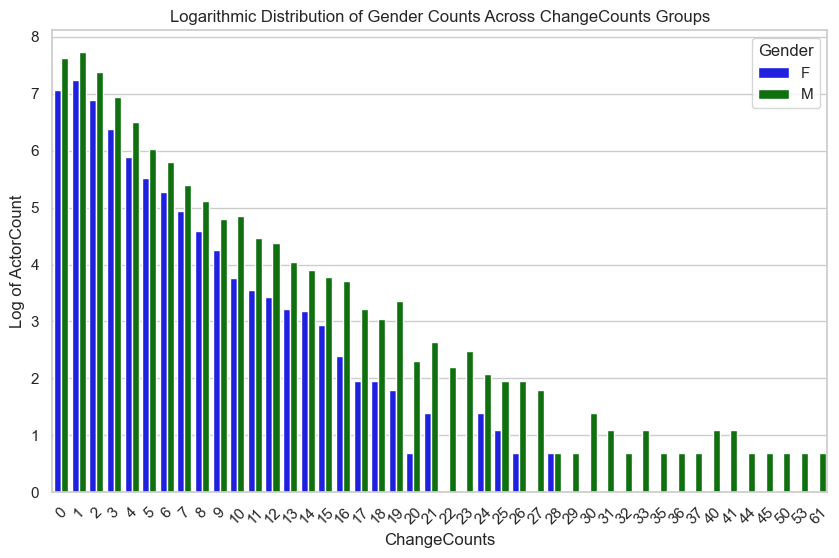

In [9]:
# 按 'ChangeCounts' 和性别分组，计算每个组的独特演员数量
actor_gender_counts = data.groupby(['ChangeCounts', 'ActorDOB'])['ActorID'].nunique().reset_index(name='ActorCount')
# Logarithmic conversion of ActorCount
actor_gender_counts['LogActorCount'] = np.log1p(actor_gender_counts['ActorCount'])  # Use log1p to avoid taking logarithms of 0.

#Charting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='ChangeCounts', y='LogActorCount', hue='ActorDOB', data=actor_counts, palette=['blue', 'green'])
plt.title('Logarithmic Distribution of Gender Counts Across ChangeCounts Groups')
plt.xlabel('ChangeCounts')
plt.ylabel('Log of ActorCount')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

The provided bar chart illustrates the logarithmic distribution of actor counts by gender across different groups defined by the number of role changes (ChangeCounts). Here's an analysis based on the visual representation:

Role Change Frequency:

The ChangeCounts on the x-axis likely represents the number of times actors have changed roles or the diversity of roles they have played. The values are spread out along the x-axis, with a higher concentration of bars towards the left side, indicating that most actors have fewer role changes, while fewer actors have a higher number of role changes.
Gender Distribution:

The bars are colored by gender, with blue representing female (F) actors and green representing male (M) actors. The distribution shows a higher number of male actors across all ChangeCounts categories as indicated by the green bars, suggesting that male actors tend to have more diverse roles or more frequent role changes compared to female actors.
Logarithmic Scale Interpretation:

The y-axis displays the logarithm of the actor count, which helps to manage the wide range of values and highlight differences across orders of magnitude. A logarithmic scale is particularly useful in data sets with a heavy-tailed distribution, where most of the data points are clustered around the lower end of the range.
Trend Analysis:

Both genders show a decreasing trend in actor counts as ChangeCounts increase, but this decrease is more rapid for female actors. This might suggest that while both male and female actors have fewer high-frequency role changes, this phenomenon is more pronounced among females.
Interpretation of Data Spread:

The graph shows a general trend that as the number of role changes increases, the number of actors (both male and female) decreases. This is consistent with the expectation that not many actors have a vast diversity of roles in their careers.
In summary, the chart highlights potential disparities in the acting industry, with male actors exhibiting a higher frequency of role changes across the spectrum compared to female actors. The use of a logarithmic scale on the actor counts enables us to discern the distribution more clearly, even where there are large differences in the number of actors between different ChangeCounts groups.

Exploring the Impact of Gender and Reputation on Role Diversity in the Film Industry
In this analysis, we delve into how an actor's gender and reputation, as indicated by Oscar recognition, influence the variety of roles they play. Our goal is to uncover potential trends and disparities in the film industry, particularly focusing on role diversity.

Creating a Reputation Metric
We define an actor's reputation based on their association with the Oscars - either as a winner or a nominee. A new column, HighReputation, is created in the dataset where:

HighReputation is set to 1 (high) if the actor has either won or been nominated for an Oscar.
HighReputation is set to 0 (low) otherwise.
This distinction allows us to compare actors with high industry recognition against those with lower or no Oscar-related accolades.

Analyzing Role Transition Frequencies
Our primary measure of role diversity is the ChangeCounts, which represents the frequency of changes in the types of roles an actor plays. We calculate the average ChangeCounts for each subgroup formed by gender (ActorDOB) and reputation (HighReputation).

Visualization Approach
Plot Type: Bar Plot.
X-axis: Represents the gender of the actors.
Y-axis: Shows the average ChangeCounts, indicating the average frequency of role changes.
Hue: Differentiates between actors with high and low reputation.
Insights from the Plot
By examining the bar plot, we aim to understand:

Whether gender influences an actor's likelihood to diversify their roles.
The impact of having high recognition (like an Oscar nomination or win) on an actor's career flexibility and role variety.
The results of this analysis can shed light on patterns and biases in role allocation within the film industry, contributing to discussions around diversity and representation in cinema.

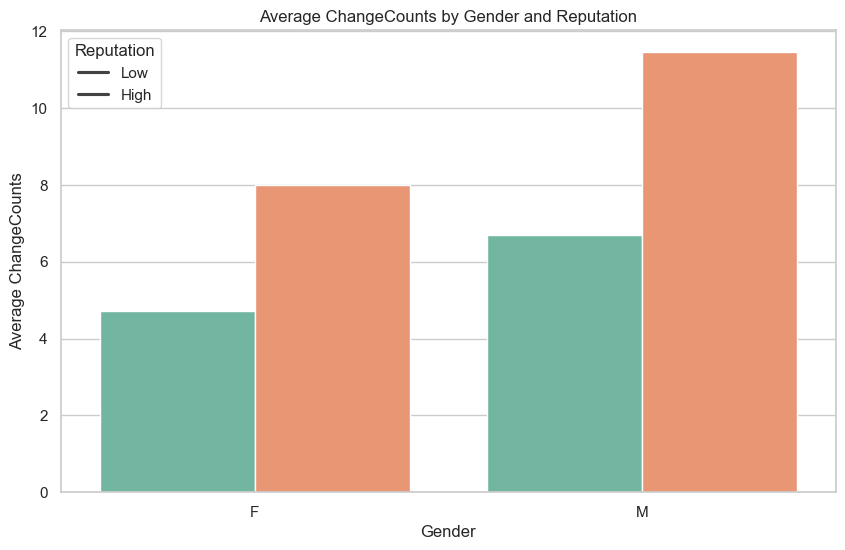

In [10]:
# Create a new column indicating reputation (OscarWinner or OscarNomination is considered high if either is 1)
data['HighReputation'] = data.apply(lambda x: 1 if x['OscarWinner'] == 1 or x['OscarNomination'] == 1 else 0, axis=1)

# Calculate the average number of transitions for each gender and reputation subgroup
grouped_data = data.groupby(['ActorDOB', 'HighReputation'])['ChangeCounts'].mean().reset_index()

# Drawing bar graphs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='ActorDOB', y='ChangeCounts', hue='HighReputation', data=grouped_data, palette='Set2')
plt.title('Average ChangeCounts by Gender and Reputation')
plt.xlabel('Gender')
plt.ylabel('Average ChangeCounts')
plt.legend(title='Reputation', labels=['Low', 'High'])
plt.show()

The bar chart displays the average number of role changes, referred to as Average ChangeCounts, categorized by gender and reputation. From this visualization, we can discern several key points:

Gender Disparity: There is a distinct difference in the average number of role changes between male and female actors. Male actors (M) have a higher average ChangeCounts compared to female actors (F), indicating that male actors may experience a greater variety of roles throughout their careers.

Reputation Influence: Actors with a high reputation, which is defined by either an Oscar win or nomination, have a higher average ChangeCounts in both gender categories. This suggests that actors who are recognized by the Oscars are likely to have more diverse roles. It's worth noting that the increase in average ChangeCounts due to high reputation is more pronounced in male actors.

Role Versatility and Industry Recognition: The trend shows that industry recognition (high reputation) correlates with a higher frequency of role changes. This could imply that actors who are more versatile and take on a variety of roles may have a higher chance of being recognized by prestigious awards like the Oscars.

Potential Bias in Role Diversity: The disparity in role changes between genders could point towards an underlying bias in the industry, where male actors are provided with more opportunities for diverse roles compared to female actors. This is evidenced by the fact that even with a high reputation, female actors have a lower average ChangeCounts than their male counterparts.

In conclusion, the bar chart indicates that both gender and reputation play significant roles in the diversity of roles that actors are involved in. The data suggests that male actors enjoy more role diversity overall, and that high reputation amplifies this effect for both genders. However, the disparity between male and female actors, even among those with high reputation, highlights ongoing issues with gender equality in the film industry.

In this visualization, we explore the distribution of role transformation frequencies among actors, differentiated by gender and Oscar nomination status. Our aim is to understand how often actors change the types of roles they play, and if this frequency is influenced by their gender or recognition in the film industry (indicated by Oscar nominations).



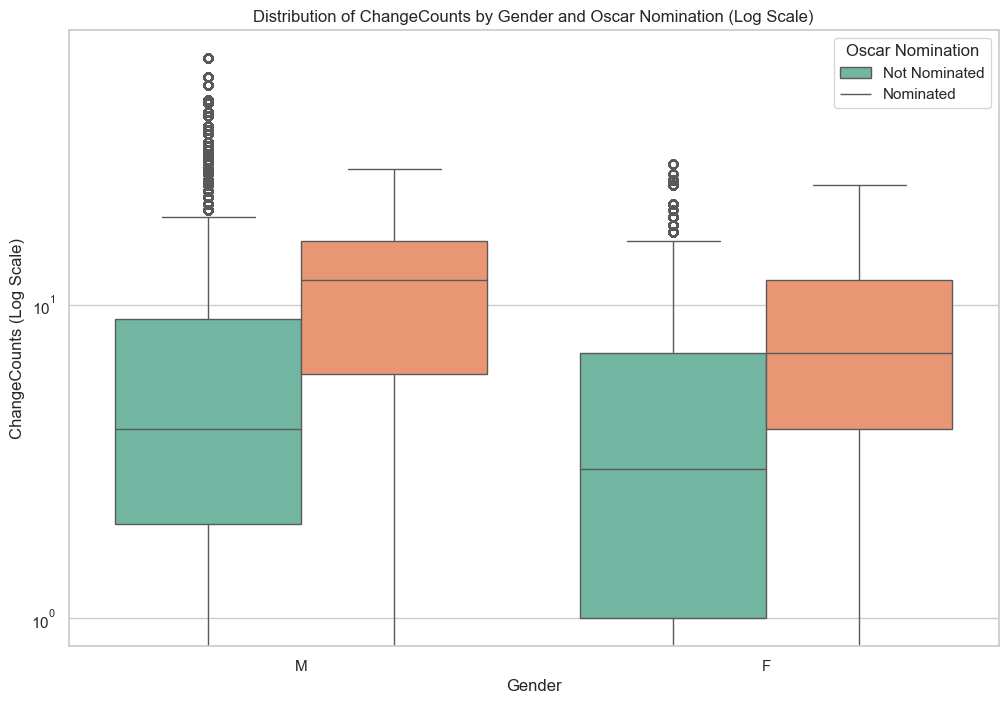

In [15]:
# Plotting box plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='ActorDOB', y='ChangeCounts', hue='HighReputation', data=data, palette='Set2')

# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.title('Distribution of ChangeCounts by Gender and Oscar Nomination (Log Scale)')
plt.xlabel('Gender')
plt.ylabel('ChangeCounts (Log Scale)')
plt.legend(title='Oscar Nomination', labels=['Not Nominated', 'Nominated'])
plt.show()

The provided boxChangeCounts) for actors based on two factors: gender (Male or Female) and Oscar nomination status (Nominated or Not Nominated). The y-axis is on a logarithmic scale, which allows for a more nuanced view of the data across a wide range of values.

Here are some detailed observations and analysis based on the box plot:

Gender Differences: There are observable differences between the distributions of male and female actors' role changes. It appears that the median value of role changes for males is slightly higher than for females, suggesting that on average, male actors may experience more role variety or career changes than their female counterparts.

Impact of Oscar Nomination:

Male Actors: For male actors, there is a noticeable difference in the role change counts between those who have been nominated for an Oscar and those who have not. Nominated male actors tend to have a wider interquartile range (IQR) and higher median, indicating more variability and a higher average number of role changes.
Female Actors: Female actors show a similar pattern, where those who have been nominated for an Oscar also have a wider IQR and higher median compared to those who have not been nominated. This suggests that Oscar-nominated female actors also tend to have a higher average number of role changes.
Outliers: The plot shows several outliers for both genders and nomination statuses, indicating that there are actors who have role change counts significantly higher than the general population. This could be indicative of highly versatile actors or those who have had unusually diverse career paths.

Logarithmic Scale: The use of a logarithmic scale on the y-axis indicates that the data spans multiple orders of magnitude. This suggests that while many actors have relatively few role changes, there is a subset of actors with a significantly higher number of changes.

Interpretation of Reputation: The wider spread and higher median of role changes for Oscar-nominated actors could imply that a high reputation within the industry, as signified by Oscar recognition, is associated with a more diverse range of roles. However, it could also reflect that actors who have more varied roles are more likely to be noticed and nominated for Oscars.

In summary, the box plot indicates that gender and Oscar nomination status may both be factors in the diversity of roles an actor plays. Actors with an Oscar nomination, regardless of gender, tend to have a higher frequency of role changes. The variability in role changes is also greater among Oscar-nominated actors, which could point towards the complexity of career trajectories for actors achieving high recognition in the film industry.